In [1]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd


2024-10-08 06:42:34.219116: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-08 06:42:34.867290: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-08 06:42:34.867381: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-08 06:42:34.954940: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-08 06:42:35.137834: I tensorflow/core/platform/cpu_feature_guar

In [27]:
def preprocess_dataset(x, y):
    x = np.expand_dims(x, -1)
    # x = x / 255
    y = keras.utils.to_categorical(y, num_classes=10)
    return x, y


(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape)

(x_train, y_train) = preprocess_dataset(x_train, y_train)
(x_test, y_test) = preprocess_dataset(x_test, y_test)

print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)
(60000, 28, 28, 1) (60000, 10)


In [15]:
def get_model():
    inputs = keras.Input(shape=(28,28,1))
    
    x = keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same')(inputs)
    x = keras.layers.MaxPooling2D()(x)
    
    x = keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same')(x)
    x = keras.layers.MaxPooling2D()(x)
    
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(64, activation="relu")(x)
    outputs = keras.layers.Dense(10, activation="softmax")(x)
    
    return keras.Model(inputs, outputs)


In [16]:
model = get_model()
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1568)              0   

In [28]:
augment = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=25,
    horizontal_flip=False,
    vertical_flip=False,
    zoom_range=0.2,
    shear_range=0.2,
    brightness_range=[0.4, 1.4]
)

In [29]:
for x, y in augment.flow(x_train, y_train, batch_size=x_train.shape[0]):
    x_train_augment = x
    y_train_augment = y
    break
    
for x, y in augment.flow(x_test, y_test, batch_size=x_test.shape[0]):
    x_test_augment = x
    y_test_augment = y
    break

In [30]:
x_train_combined = np.concatenate([x_train, x_train_augment])
y_train_combined = np.concatenate([y_train, y_train_augment])
x_test_combined = np.concatenate([x_test, x_test_augment])
y_test_combined = np.concatenate([y_test, y_test_augment])

In [31]:
def train_model(x, y, epochs):
    model = get_model()
    model.compile(
        optimizer='adam',
        loss=keras.losses.CategoricalCrossentropy(),
        metrics=[
            'accuracy'
        ]
    )
    history = model.fit(x, y, validation_split=0.2, batch_size=128, epochs=epochs)
    return model, history

In [33]:
model, history = \
    train_model(x_train, y_train, 10)
    
a_model, a_history = \
    train_model(x_train_combined, y_train_combined, 10)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.5997 - accuracy: 0.8880 - val_loss: 0.1062 - val_accuracy: 0.9690
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0843 - accuracy: 0.9748 - val_loss: 0.0758 - val_accuracy: 0.9783
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0526 - accuracy: 0.9835 - val_loss: 0.0641 - val_accuracy: 0.9817
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0387 - accuracy: 0.9870 - val_loss: 0.0690 - val_accuracy: 0.9810
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0306 - accuracy: 0.9901 - val_loss: 0.0656 - val_accuracy: 0.9836
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0253 - accuracy: 0.9918 - val_loss: 0.0604 - val_accuracy: 0.9835
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0225 - accuracy: 0.9920 - val_loss: 0.0636 - val_accuracy: 0.9844
Epoch 

In [34]:
model.evaluate(x_test, y_test, batch_size=128, return_dict=True)
model.evaluate(x_test_combined, y_test_combined, batch_size=128, return_dict=True)

a_model.evaluate(x_test, y_test, batch_size=128, return_dict=True)
a_model.evaluate(x_test_combined, y_test_combined, batch_size=128, return_dict=True)

157/157 [==============================] - 0s 2ms/step - loss: 0.0626 - accuracy: 0.9838


{'loss': 0.06255543977022171, 'accuracy': 0.9837999939918518}

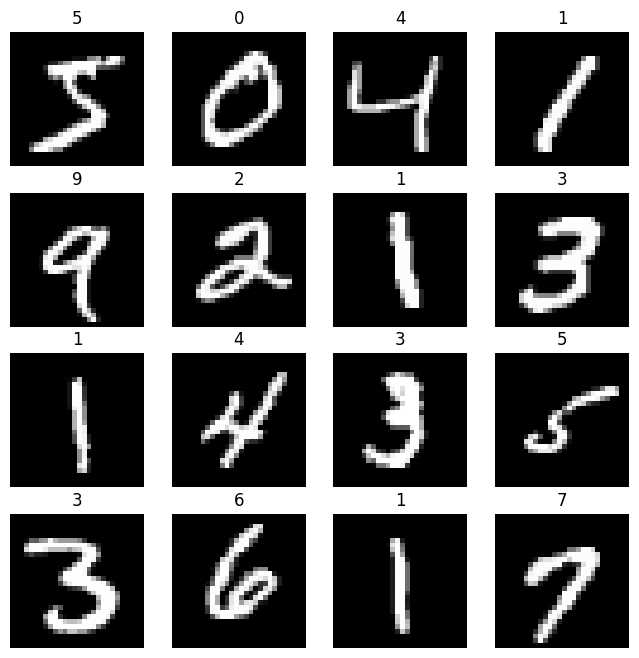

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4,4,i+1)    
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    plt.title(np.argmax(y_train[i]))

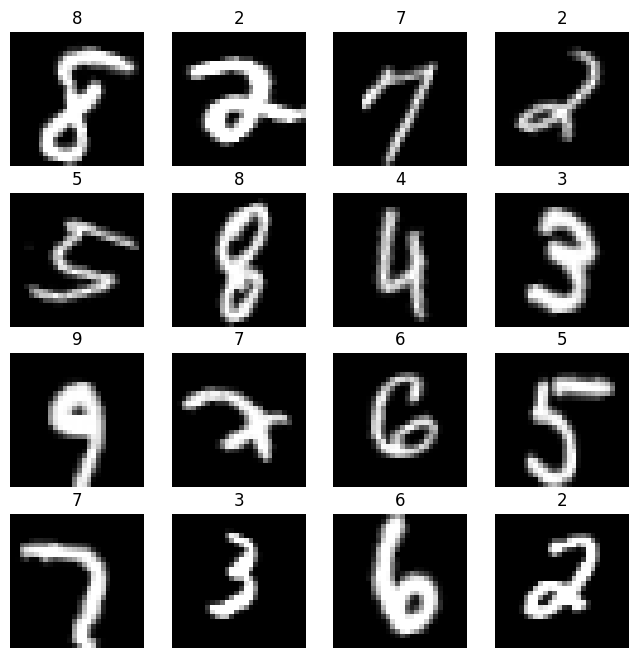

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4,4,i+1)    
    plt.imshow(x_train_augment[i], cmap='gray')
    plt.axis('off')
    plt.title(np.argmax(y_train_augment[i]))

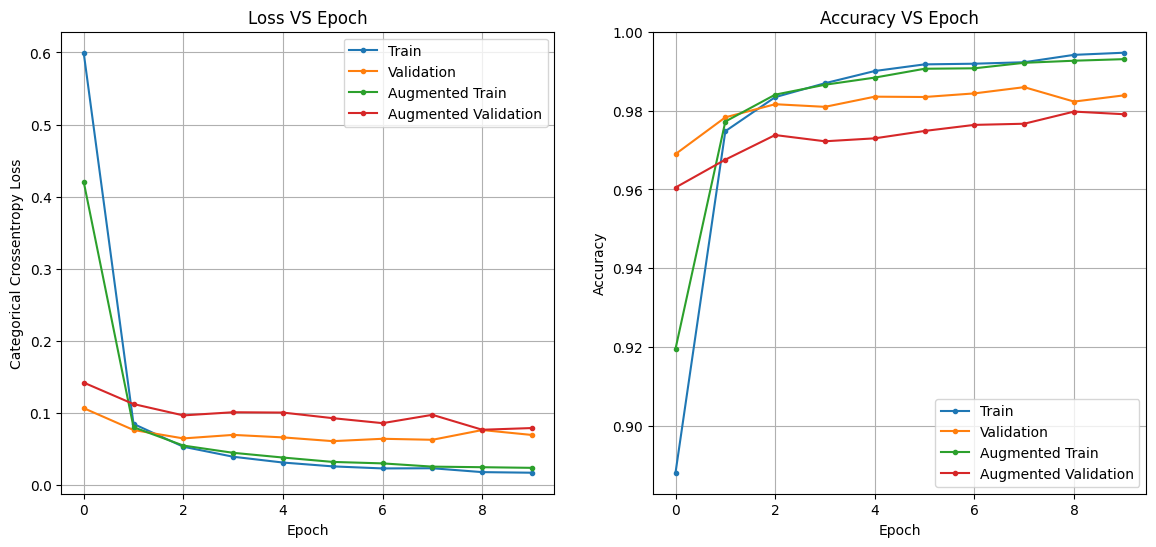

In [43]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], '.-')
plt.plot(history.history['val_loss'], '.-')

plt.plot(a_history.history['loss'], '.-')
plt.plot(a_history.history['val_loss'], '.-')

plt.xlabel('Epoch')
plt.ylabel('Categorical Crossentropy Loss')
plt.legend(["Train", "Validation", "Augmented Train", "Augmented Validation"])
plt.title('Loss VS Epoch')
plt.grid('on')


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], '.-')
plt.plot(history.history['val_accuracy'], '.-')

plt.plot(a_history.history['accuracy'], '.-')
plt.plot(a_history.history['val_accuracy'], '.-')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(["Train", "Validation", "Augmented Train", "Augmented Validation"])
plt.title('Accuracy VS Epoch')
plt.grid('on')